# HOMEWORK 1

### 1) Pandas kütüphanesiyle bir DataFrame oluşturup ve içine Levels of Measurements'ları nominal, ordinal, interval ve ratio olan kolonlar ekleyelim.

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import stats

`"sex"` kolonu nominal, `"education_level"` kolunu ordinal, `"IQ"` kolunu interval ve `"Age"` kolonu ratio'dur.

In [2]:
data = {"sex": ["female", "female", "male", "female", "male", "female", "male", "female", "female", "male"],
        "educational_level": ["doctoral", "bachelor's", "associate", "doctoral", "bachelor's", "master's", "bachelor's", "master's", "associate", "doctoral"],
        "IQ": [110, 115, 101, 117, 105, 112, 95, 98, 102, 97],
        "Age": [27, 23, 18, 29, 22, 24, 21, 28, 18, 29]    
}

df = pd.DataFrame(data)
df

,sex,educational_level,IQ,Age
0,female,doctoral,110,27
1,female,bachelor's,115,23
2,male,associate,101,18
3,female,doctoral,117,29
4,male,bachelor's,105,22
5,female,master's,112,24
6,male,bachelor's,95,21
7,female,master's,98,28
8,female,associate,102,18
9,male,doctoral,97,29


### 2) Ekli data üzerindeki aşağıda yer alan kolonların count, mean, std, min, 25%, 50%, 75%, max değerlerini ve IQR metoduyla outlier kalan veri sayısını çıkartıp, bu değerleri sözel ve karşılaştırmalı olarak yorumlayalım.

        
Kolonlar : radius_mean, area_mean, compactness_mean

In [3]:
#csv okuma
data = pd.read_csv("data.csv", sep = ",")

In [4]:
df = pd.DataFrame(data, columns = ["radius_mean","area_mean","compactness_mean"])
df.describe()

,radius_mean,area_mean,compactness_mean
count,569.000000,569.000000,569.000000
mean,14.127292,654.889104,0.104341
std,3.524049,351.914129,0.052813
min,6.981000,143.500000,0.019380
25%,11.700000,420.300000,0.064920
50%,13.370000,551.100000,0.092630
75%,15.780000,782.700000,0.130400
max,28.110000,2501.000000,0.345400


In [5]:
Q1 = np.quantile(df["radius_mean"], 0.25)
Q3 = np.quantile(df["radius_mean"], 0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

print("Anything outside this range is an outlier: (", lower_bound, " , ", upper_bound, ")")

outliers = df[(df["radius_mean"] < lower_bound) | (df["radius_mean"] > upper_bound)].radius_mean.values
print("Outliers: ", outliers)
print("Number of outliers for radius_mean: ", len(outliers))

Anything outside this range is an outlier: ( 5.579999999999999  ,  21.9 )
Outliers:  [25.22 22.27 24.25 23.27 27.22 23.29 28.11 23.21 23.51 25.73 22.01 27.42
 23.09 24.63]
Number of outliers for radius_mean:  14


In [6]:
Q1 = np.quantile(df["area_mean"], 0.25)
Q3 = np.quantile(df["area_mean"], 0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

print("Anything outside this range is an outlier: (", lower_bound, " , ", upper_bound, ")")

outliers = df[(df["area_mean"] < lower_bound) | (df["area_mean"] > upper_bound)].radius_mean.values
print("Outliers: ", outliers)
print("Number of outliers for area_mean: ", len(outliers))

Anything outside this range is an outlier: ( -123.30000000000001  ,  1326.3000000000002 )
Outliers:  [21.16 25.22 22.27 24.25 23.27 27.22 23.29 28.11 23.21 20.94 20.73 21.75
 23.51 25.73 21.71 22.01 21.37 20.64 21.61 21.1  27.42 23.09 24.63 20.92
 21.56]
Number of outliers for area_mean:  25


In [7]:
Q1 = np.quantile(df["compactness_mean"], 0.25)
Q3 = np.quantile(df["compactness_mean"], 0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

print("Anything outside this range is an outlier: (", lower_bound, " , ", upper_bound, ")")

outliers = df[(df["compactness_mean"] < lower_bound) | (df["compactness_mean"] > upper_bound)].radius_mean.values
print("Outliers: ", outliers)
print("Number of outliers for compactness_mean: ", len(outliers))

Anything outside this range is an outlier: ( -0.03329999999999997  ,  0.22861999999999996 )
Outliers:  [17.99 11.42 12.46 19.17 13.73 20.18 25.22 22.27 24.25 21.09 14.22 15.66
 15.75 25.73 17.91 20.6 ]
Number of outliers for compactness_mean:  16


### 3) Ekli data üzerindeki aşağıda yer alan kolonların birbirleriyle olan korelasyonlarını, covaryanslarını, Pearson Correlation Coefficientlarını, Spearman Rank Coefficientlarını ve Effect Size'larını bularak sözel ve karşılaştırmalı olarak yorumlayalım.

        
Kolonlar : radius_mean, area_mean, compactness_mean

**Korelasyon**; değişkenler arasındaki ilişki, bu ilişkinin yönü ve şiddeti ile ilgili bilgiler sağlayan istatistiksel bir yöntemdir. Her zaman -1 ile +1 değerleri arasında bir değer verir.

Korelasyon katsayısı negatif ise iki değişken arasında ters ilişki vardır, yani "değişkenlerden biri artarken diğeri azalmaktadır" denir. Korelasyon katsayısı pozitif ise "değişkenlerden biri artarken diğeride artmaktadır" yorumu yapılır.

**Kovaryans**, iki değişken arasındaki doğrusal ilişkinin değişkenliğini ölçen bir kavramdır. Betimsel istatistiktir. Yani var olan bir şeyi bize söyler. Ortada tahmin yoktur. Sonucun pozitif olması artan bir doğrusal ilişkiyi, negatif olması azalan bir doğrusal ilişkiyi ve sıfır civarında olması ilişkinin olmadığını gösterir.

Verilerin normal dağılıma sahip olması durumunda **Pearson korelasyon katsayısı**, verilerin normal dağılmadığı durumda ise **Spearman Rank korelasyon katsayısı** tercih edilir. Bir korelasyon katsayısının yorumlanabilmesi için p değerinin 0.05 den daha küçük olması gerekir.

**Korelasyon Analizi**

**Yarıçap** ile **alan** arasında yüksek pozitif korelasyon vardır.

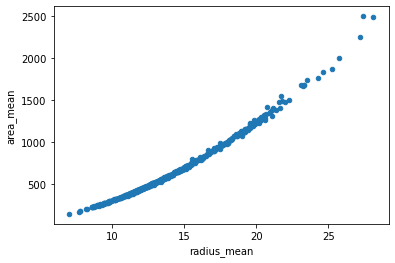

In [8]:
df.plot.scatter("radius_mean","area_mean"); 

In [9]:
df["radius_mean"].corr(df["area_mean"]) #yarıçap ve alan arasındaki korelasyon

0.9873571700566117

In [10]:
df["radius_mean"].cov(df["area_mean"]) #yarıçap ve alan arasındaki kovaryans

1224.4834093464565

In [11]:
df["radius_mean"].corr(df["area_mean"], method = "pearson") #yarıçap ve alan arasındaki Pearson korelasyon katsayısı

0.9873571700566117

In [12]:
stats.spearmanr(df["radius_mean"],df["area_mean"]) #yarıçap ve alan arasındaki Spearman sıra katsayısı

SpearmanrResult(correlation=0.9996020278067481, pvalue=0.0)

**Yarıçap** ile **yoğunluk** arasında düşük pozitif korelasyon vardır.

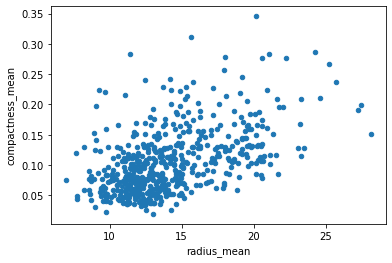

In [13]:
df.plot.scatter("radius_mean","compactness_mean");

In [14]:
df["radius_mean"].corr(df["compactness_mean"]) #yarıçap ve yoğunluk arasındaki korelasyon

0.5061235775263635

In [15]:
df["radius_mean"].cov(df["compactness_mean"]) #yarıçap ve yoğunluk arasındaki kovaryans

0.09419705682504519

In [16]:
df["radius_mean"].corr(df["compactness_mean"], method = "pearson") #yarıçap ve yoğunluk arasındaki Pearson korelasyon katsayısı

0.5061235775263635

In [17]:
stats.spearmanr(df["radius_mean"],df["compactness_mean"]) #yarıçap ve yoğunluk arasındaki Spearman sıra katsayısı

SpearmanrResult(correlation=0.49757760995795647, pvalue=6.3349241442214955e-37)

**Alan** ile **yoğunluk** arasında düşük pozitif korelasyon vardır.

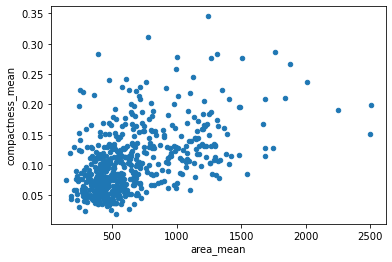

In [18]:
df.plot.scatter("area_mean","compactness_mean");

In [19]:
df["area_mean"].corr(df["compactness_mean"]) #alan ve yoğunluk arasındaki korelasyon

0.49850168215241164

In [20]:
df["radius_mean"].cov(df["compactness_mean"]) #alan ve yoğunluk kovaryans

0.09419705682504519

In [21]:
df["area_mean"].corr(df["compactness_mean"], method = "pearson") #alan ve yoğunluk Pearson korelasyon katsayısı

0.49850168215241164

In [22]:
stats.spearmanr(df["area_mean"],df["compactness_mean"]) #alan ve yoğunluk Spearman sıra katsayısı

SpearmanrResult(correlation=0.4889883974982949, pvalue=1.5419515156000542e-35)

### 4) Bayes Teoreminin gerçek hayatta karşımıza çıkan ve kullanılan örneklerinden 5 tane bulalım.

$$
P(A|B)=\frac{P(A) P(B|A)}{P(B)}
$$

`P(A|B)` : B olayı gerçekleştiğinde A olayının gerçekleşme olasılığı

`P(A)` : A olayının gerçekleşme olasılığı

`P(B|A)` : A olayı gerçekleştiğinde B olayının gerçekleşme olasılığı

`P(B)` : B olayının gerçekleşme olasılığı

**Example 1:** Her 43 çocuktan 1 tanesi, yetişkinlikte ortaya çıkan belli bir hastalığa yakalanmakta ve tam güvenilir olmamasına rağmen yapılan test sonuçlarına göre, hastalıklı bir çocuğun testi %80 pozitif, sağlıklı bir çocuğun testi ise %10 pozitif sonuç vermektedir. Bu bilgilere göre test sonucu pozitif olan bir çocuğun gerçekten hasta olma olasılığını bulalım.

`P(A)` : Çocuğun hasta olması olasılığı = 1/43

`P(B)` : Testin pozitif çıkması olasılığı = 1/43 * 0.80 + 42/43 * 0.10 = 5/43

`P(A|B)` : Pozitif çıkan testin hastalık çıkma olasılığı

`P(B|A)` : Hastalıklı çocuğun testinin pozitif çıkma olasılığı = 0.80

$$
P(A|B)=\frac{P(A) P(B|A)}{P(B)}=\frac{(0.80 * 1/43)}{(5/43)}= 0.16
$$

**Example 2:** Ali kaşındığını söylüyor. Kedi alerjisi için bir test var, ancak bu test her zaman doğru değil: Gerçekten alerjisi olan insanlar için, testin `Evet` sonucu vermesi %80 oranında. Alerjisi olmayan insanlar için, testin `Evet` sonucu vermesi %10 oranında (false positive). Nüfusun %1’inde alerji varsa ve test `Evet` çıkıyorsa, Ali’nin gerçekten alerji olma olasılığını bulalım. 

`P(A)` : Alerji olma olasılığı = 0.01

`P(B)` : Testin evet çıkma olasılığı = 0.01 * 0.80 + 0.99 * 0.10 = 0.107

`P(A|B)` : Testin evet çıkması durumunda alerji olasılığı

`P(B|A)` : Alerji olması durumunda testin evet çıkma olasılığı = 0.80

$$
P(A|B)=\frac{P(A) P(B|A)}{P(B)}=\frac{(0.01 * 0.80)}{(0.107)} = 0.075
$$

**Example 3:** Bir hava üssünde tehlike olduğu zaman alarm sisteminin çalışma olasılığı 0.99, tehlike olmadığında alarm sisteminin çalışmama olasılığı 0.98 ve herhangi bir anda tehlike olma olasılığı da 0.003’tür. Hava üssündeki alarm çalıştığına göre, tehlike durumunun olma olasılığını bulalım.

`P(A)` : Alarm sisteminin çalışması olasılığı = 0.003 * 0.99 + 0.997 * 0.02 = 0.02291

`P(B)` : Tehlike olması olasılığı = 0.003

`P(A|B)` : Tehlike olduğu durumda alarm sisteminin çalışma olasılığı = 0.99

`P(B|A)` : Alarm sisteminin çalıştığı durumda tehlike olma olasılığı 

$$
P(A|B)=\frac{P(A) P(B|A)}{P(B)}=0.99=\frac{(0.02291 * P(B|A))}{(0.003)} 
$$

`P(B|A)` = 0.1296377128

**Example 4:** Bir atölyede imal edilen malların istenilen normlara uyan iyi bir mal olarak kabul edilme olasılığı 0.96’dır. Yapılan bir teknik kontrol sistemine göre iyi bir mal için bunun iyi olduğunu ortaya çıkarma olasılığı 0.98 dir. Kötü olan bir malın iyi olduğu yolunda karar verme olasılığı 0.05’dir. İki kez yapılan çekime göre bir malın iyi olduğu sonucuna varıldığına göre, bu malın gerçekten iyi olma olasılığını bulalım.

`P(A)` : Malın iyi mal olması 

`P(B)` : Malın iyi kabul edilmesi olasılığı = 0.96

`P(A|B)` : Malın iyi kabul edilmesi durumunda iyi mal olması olasılığı = 0.95

`P(B|A)` : Malın iyi mal olması durumunda iyi kabul edilmesi olasılığı = 0.98

$$
P(A|B)=\frac{P(A) P(B|A)}{P(B)}=0.95=\frac{(P(A) * 0.98)}{(0.96)} 
$$

`P(A)`= 0.9306122449

**Example 5:** Bellli bir  klinikte hastaların %10'una narkotik ağrı kesiciler reçete edilir. Genel olarak, klinik hastalarının %5'i narkotiklere bağımlıdır. Ağrı kesici reçete edilen tüm insanların %8'i bağımlıdır. Bir hasta bağımlıysa, kendisine ağrı kesici reçete edilme olasılığını bulalım.

`P(A)` : Hastaya ağrı kesici yazılma olasılığı = 0.10

`P(B)` : Hastanın bağımlı olması olasılığı = 0.05

`P(A|B)` : Hastanın bağımlı olması durumunda ağrı kesici yazılma olasılığı

`P(B|A)` : Ağrı kesici yazılan hastanın bağımlı olma olasılığı = 0.08

$$
P(A|B)=\frac{P(A) P(B|A)}{P(B)}=\frac{(0.10 * 0.08)}{(0.05)} = 0.16
$$

### 5) Poisson, Normal, Gamma, Weilbull ve Logaritmik dağılımların benzer ve farklı yönlerini bir tablo halinde çıkaralım. (Araştırma Ödevi)

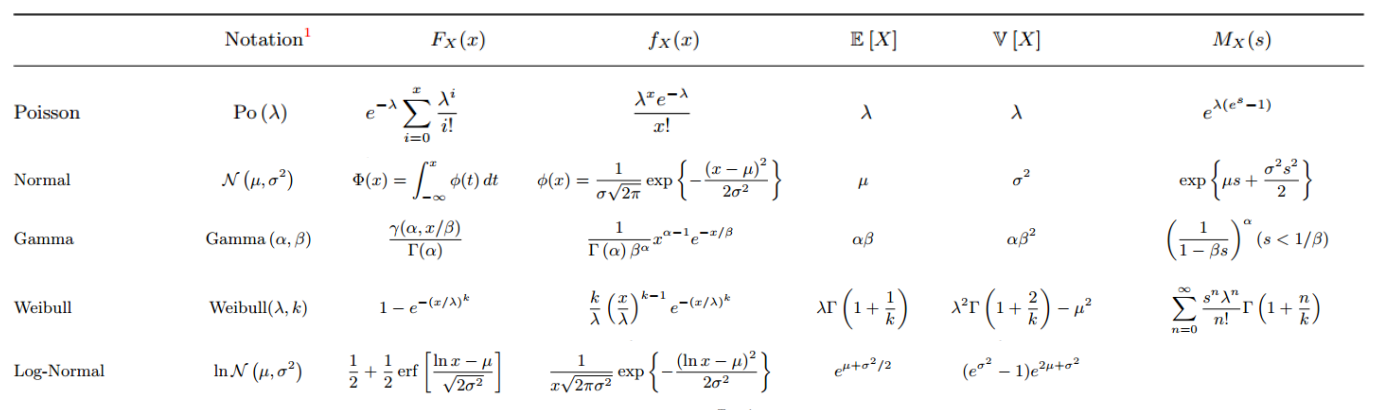

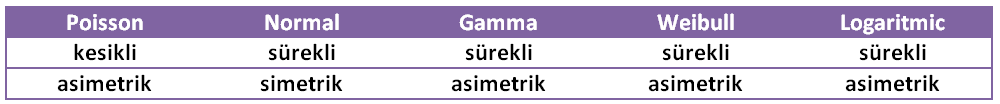